# Import data

In [6]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
columns = list(data_immo.drop(['Unnamed: 0','longitude','latitude'],axis = 1).columns)

In [8]:
columns_with = list(data_immo_with_imputation.drop(['Unnamed: 0','longitude','latitude'],axis = 1).columns)

In [9]:
from scipy.stats import pearsonr
# On pose les hypothèses de départ :

# H0 : Variables indépendantes si p-value > 5% H1 : Variables non indépendantes si p-value < 5%

# La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)
for i in columns:
    test_personr = pearsonr(data_immo[i], data_immo['median_income'])
    print(test_personr)
# PearsonRResult(statistic=-0.08298589139832141, pvalue=1.278310306953696e-14)
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

(-0.20208410793520576, 9.148243212284339e-142)
(0.22124965651676992, 3.109038660095096e-170)
(0.02507209558776385, 0.001851859501267346)
(0.04420360835518704, 4.013543192974291e-08)
(0.04956829672108344, 7.397454949379436e-10)
(0.9999999999999998, 0.0)
(0.640404475147838, 0.0)
(-0.06582722402710177, 2.818091577017698e-16)


In [10]:
immo = data_immo.drop(['Unnamed: 0','longitude','latitude'],axis = 1)

In [11]:
immo_with = immo = data_immo_with_imputation.drop(['Unnamed: 0','longitude','latitude'],axis = 1)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(immo))
StandardScaler()
print(scaler.mean_)
scale_immo = scaler.transform(immo)

StandardScaler()
[2.82688465e+01 2.61989269e+03 5.40107435e+02 1.45474354e+03
 5.02854483e+02 3.62431698e+00 1.86363455e+05 8.95744129e-01]


In [13]:
scale_immo_to_df = pd.DataFrame(scale_immo)
scale_immo_to_df = scale_immo_to_df.rename(columns={0:'housing_median_age', 1:'total_rooms',2:'total_bedrooms',3:'population',4:'households',5:'median_income',6:'median_house_value',7:'ocean_proximity_number'}, errors='raise')
scale_immo_to_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_number
0,-1.783125,-0.346883,-0.157342,-0.049205,-0.220881,-1.412296,-1.271305,0.106141
1,-1.622979,-0.265917,-0.448075,-0.505091,-0.418983,2.167918,0.975311,-0.911937
2,-0.261745,-0.789255,-0.764599,-0.446295,-0.743148,-1.364904,-1.423599,0.106141
3,0.218691,-0.903693,-0.729429,-0.730904,-0.709702,-1.381514,0.151589,-0.911937
4,-0.582035,-0.315673,-0.391804,-0.276722,-0.336655,0.301350,-0.761064,0.106141
...,...,...,...,...,...,...,...,...
15409,-0.662108,-0.522385,-0.614543,-0.604790,-0.650529,-0.370319,-1.028968,0.106141
15410,1.659997,-0.115294,-0.084658,-0.275870,-0.115399,-0.666407,-0.925586,2.142296
15411,-0.742181,-0.040208,-0.185477,-0.211961,-0.190009,0.574434,0.069328,0.106141
15412,0.859271,0.070611,0.703135,0.929887,0.695015,-0.691653,-0.365322,-0.911937


<AxesSubplot:>

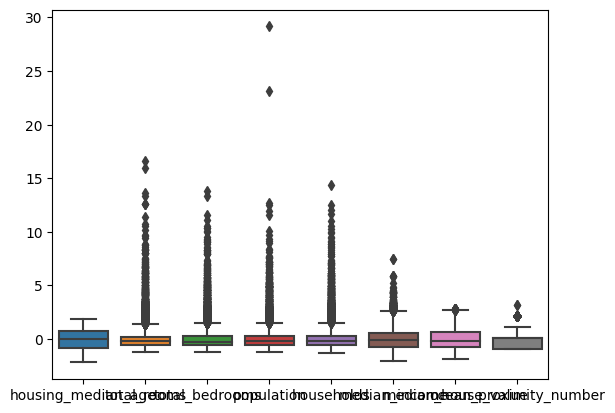

In [14]:
sns.boxplot(data = scale_immo_to_df)